# Data Mining
### Project for Data Mining, Spring 2019


Contributors
------------

* [Sofia Kostakonti](https://github.com/SofiaKstk/ "Sofia Kostakonti") : 1115201500080
* [Ioannis Pelekoudas](https://github.com/pelekoudasq/ "Ioannis Pelekoudas") : 1115201500128

#### First Part - Clean Data

Αφαιρούμε τα σύμβολα, όπως hashtags, emoticons, τα links και τα stopwords από το training set.

#### Second Part - Tokenization

Διαχωρισμός των λέξεων.

In [1]:
import pandas as pd
import numpy as np
from emoji import UNICODE_EMOJI
import re
import nltk
import string
#nltk.download('all')

DataLocation = r'./twitter_data/test2017.tsv'

df = pd.read_csv(DataLocation, sep='\t', header=None, usecols=[3])
sd = df
sd.columns = ["tweets"]

from nltk.tokenize import TweetTokenizer
tkn = TweetTokenizer()
tokens = tkn.tokenize(' '.join(sd['tweets']))

from nltk.corpus import stopwords
stop = stopwords.words("english")

tokens_clean1 = [word.lower() for word in tokens if word not in string.punctuation and word != '...' and word!='..']
tokens_stop = [word for word in tokens_clean1 if word not in (stop)]
tokens_clean = [re.sub(r'^@.*', '@user', word) for word in tokens_stop]
tokens_clean = [re.sub(r'^#.*', '#hashtag', word) for word in tokens_clean]
tokens_clean = [re.sub(r'[0-9]+', '$number', word) for word in tokens_clean]
tokens_clean = [re.sub(r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', '%url', word) for word in tokens_clean]
#tokens_clean = [for word in tokens_clean: '<emoji>' if word in UNICODE_EMOJI else word]


## Στατιστικά και δεδομένα για τις λέξεις όλων των tweets συνολικά.

##### Wordcloud για όλες τις λέξεις.

In [2]:
#python -m pip install --user wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

texts = {}
texts = ' '.join(tokens_clean)
my_stopwords = {'hashtag', 'user', 'number', 'url', 'in', 'is', 'that', 'it', 'and', 'for', 'he', 'i\'m', 'to', 'you', 'this', 'the'}
stop_words = STOPWORDS.union(my_stopwords)

wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=500, stopwords=stop_words, background_color="white", relative_scaling=.4, height=800, width=1600).generate(texts)
plt.figure(figsize=(60,40))
plt.title('All Words')
plt.imshow(wordcloud)
plt.axis('off')


(-0.5, 1599.5, 799.5, -0.5)

Χωρίζουμε τις λέξεις σε θετικές και αρνητικές σύμφωνα με το λεξικό που έχει δωθεί προκειμένου να πάρουμε κάποια στατιστικά στοιχεία.

In [3]:
Lexica = r'./lexica/affin/affin.txt'

lex = pd.read_csv(Lexica, sep="\t", header=None)
lex.columns = ["word", "weight"]

positive=[]
negative=[]
non=[]

hasht = users = num = url = 0

for w in tokens_clean:
    if '#hashtag' in w:
        hasht += 1
    elif '@user' in w:
        users += 1
    elif '$number' in w:
        num += 1
    elif '%url' in w:
        url += 1
    else:
        flag = 0
        for i in range(len(lex)):
            if w == lex['word'][i]:
                flag = 1
                if lex['weight'][i] < 0:
                    negative.append(w)
                else:
                    positive.append(w)
        if flag == 0:
            non.append(w)


#### Στατιστικά για hashtags, usertags, urls και αριθμούς.

In [4]:
hashper = round(hasht / len(tokens_clean) *100)
userper = round(users / len(tokens_clean) *100)
numper = round(num / len(tokens_clean) *100)
urlper = round(url / len(tokens_clean) *100)
print ('Hashtags    Usertags     Numbers     Urls')
print (str(hashper)+ '%         '+str(userper)+ '%           '+str(numper)+ '%          '+str(urlper)+'%')

Hashtags    Usertags     Numbers     Urls
9%         7%           3%          0%


 ##### Wordcloud για τις θετικές λέξεις.

(-0.5, 1599.5, 799.5, -0.5)

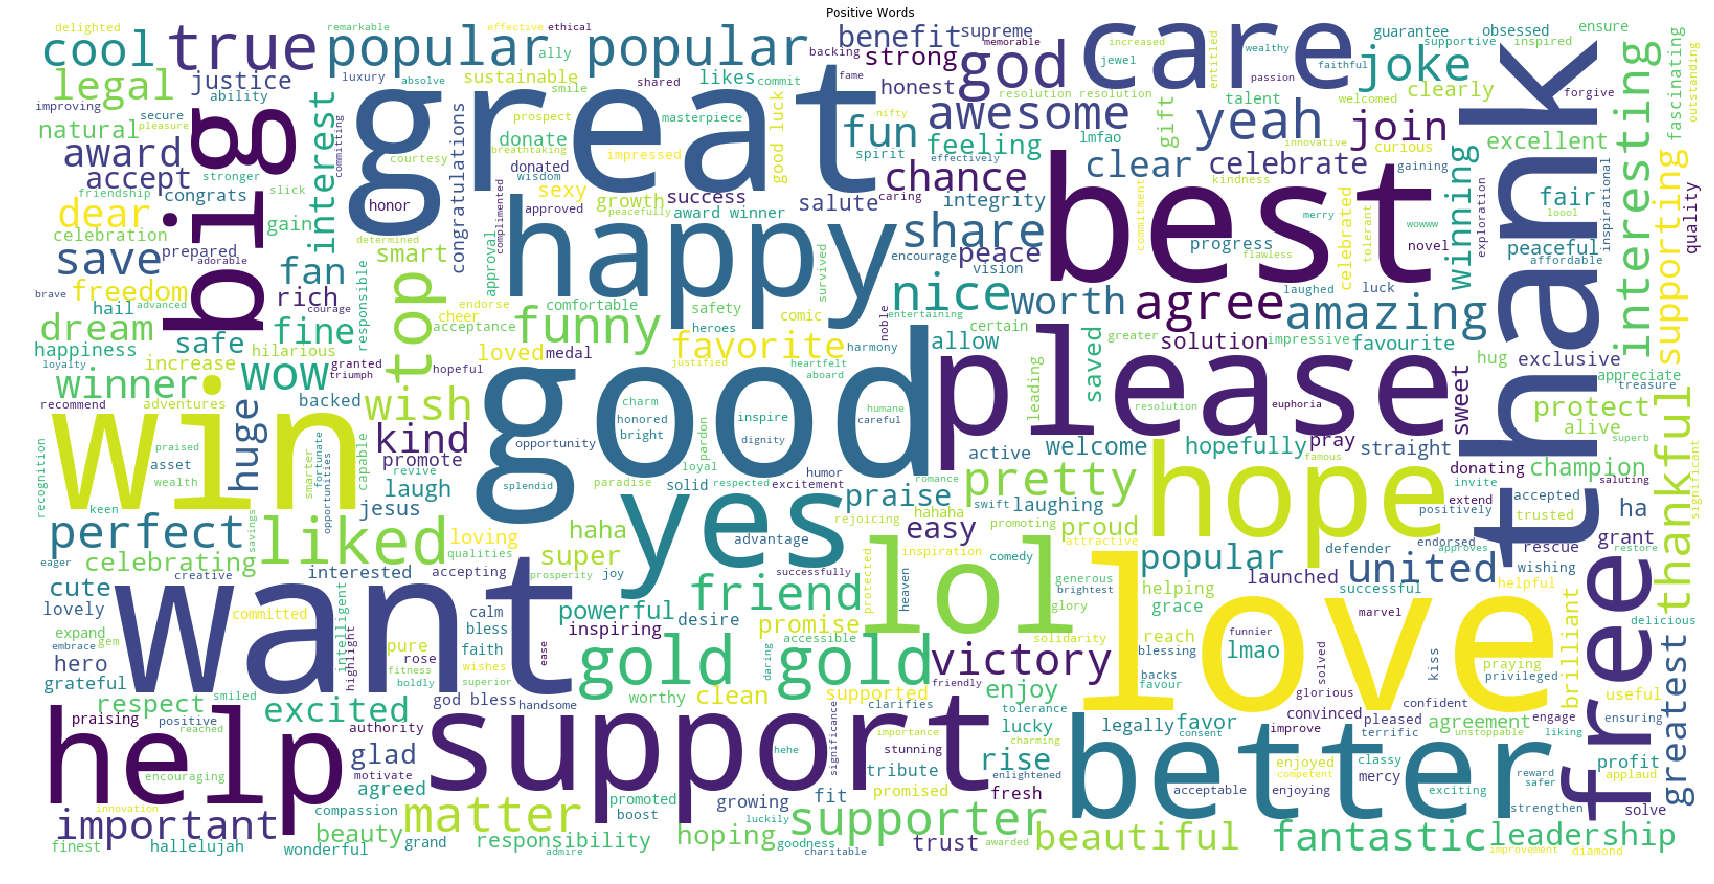

In [5]:
pos = ' '.join(positive)
cloudPos = WordCloud(max_font_size=200, min_font_size=10, max_words=500, stopwords=stop_words, background_color="white", relative_scaling=.4, height=800, width=1600).generate(pos)
plt.figure(figsize=(30, 20))
plt.title('Positive Words')
plt.imshow(cloudPos)
plt.axis('off')

##### Wordcloud για τις αρνητικές λέξεις.

(-0.5, 1599.5, 799.5, -0.5)

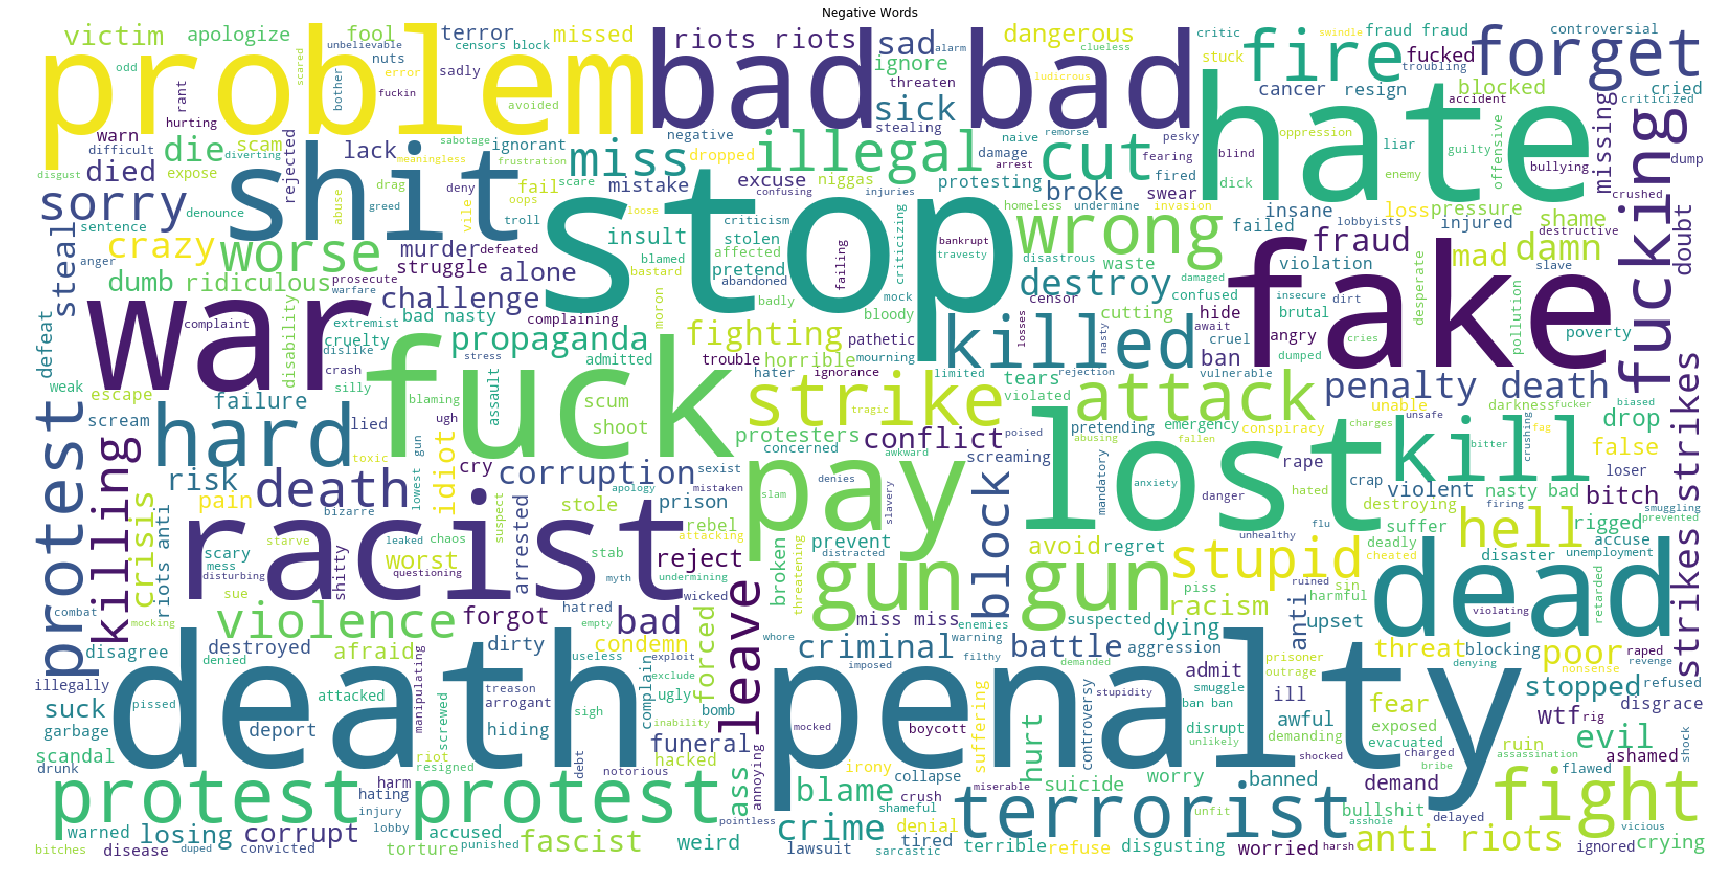

In [6]:
neg = ' '.join(negative)
cloudNeg = WordCloud(max_font_size=200, min_font_size=10, max_words=500, stopwords=stop_words, background_color="white", relative_scaling=.4, height=800, width=1600).generate(neg)
plt.figure(figsize=(30, 20))
plt.title('Negative Words')
plt.imshow(cloudNeg)
plt.axis('off')

##### Wordcloud για όλες τις υπόλοιπες λέξεις που δεν υπάρχουν στο λεξικό.

(-0.5, 1599.5, 799.5, -0.5)

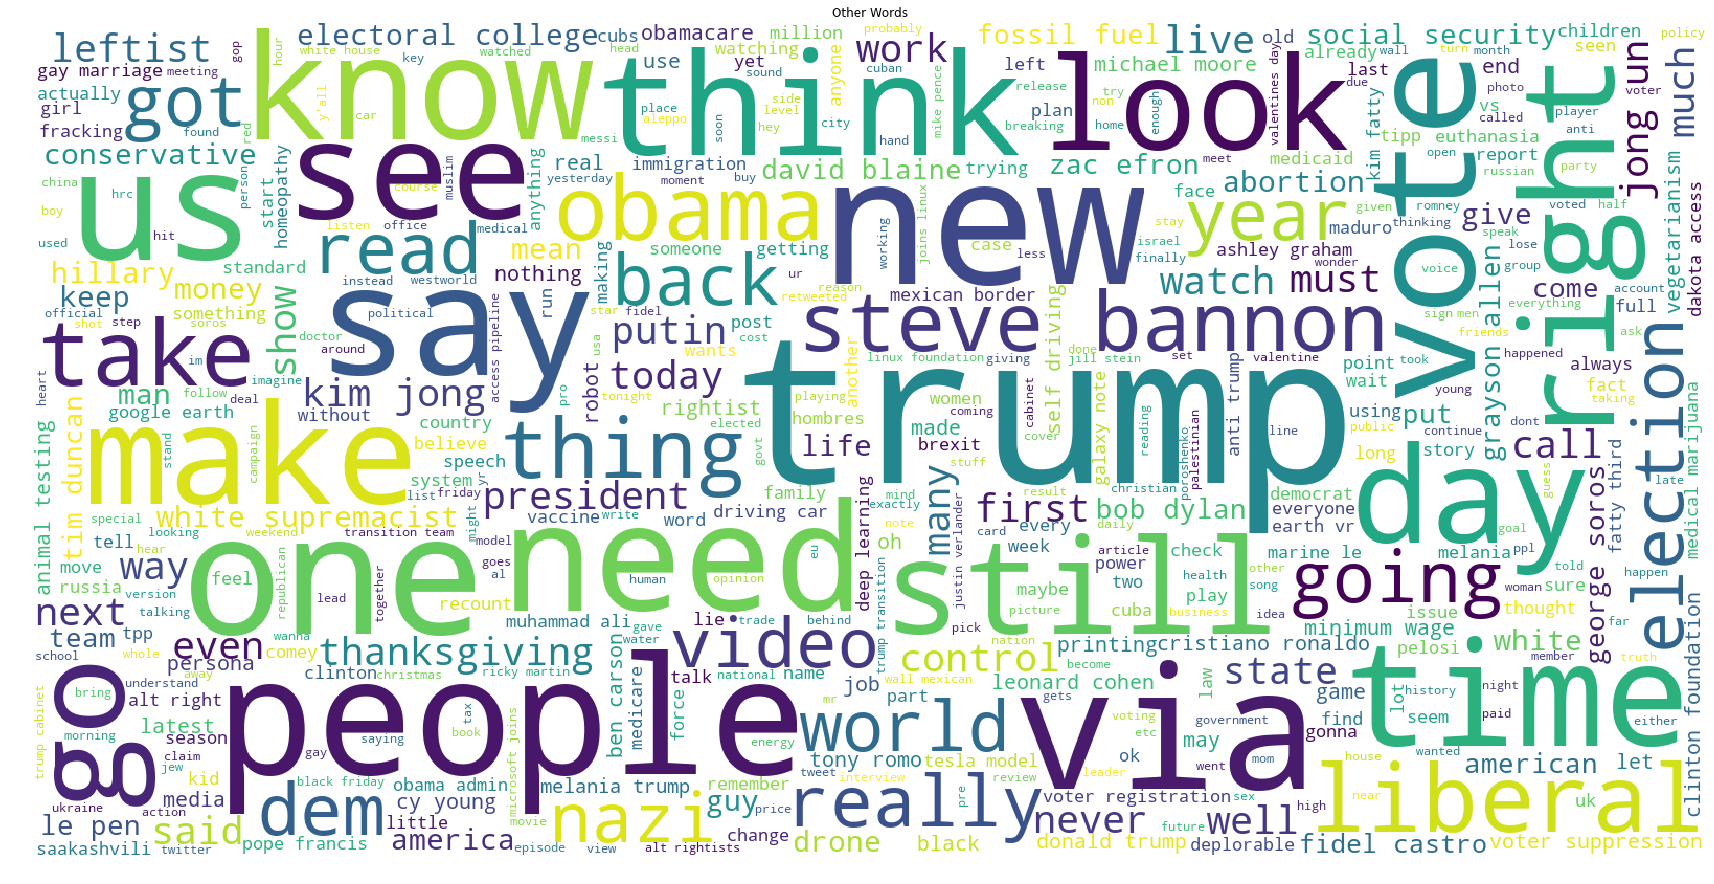

In [7]:
nan = ' '.join(non)
cloudNan = WordCloud(max_font_size=200, min_font_size=10, max_words=500, stopwords=stop_words, background_color="white", relative_scaling=.4, height=800, width=1600).generate(nan)
plt.figure(figsize=(30, 20))
plt.title('Other Words')
plt.imshow(cloudNan)
plt.axis('off')

## Στατιστικά και δεδομένα για θετικά, αρνητικά και ουδέτερα tweets ξεχωριστά.

Παίρνουμε τα αποτελέσματα των tweets από το αρχείο gold και βγάζουμε κάποια συμπεράσματα.

In [8]:
Gold = r'./twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'

res = pd.read_csv(Gold, sep="\t", header=None)
#res.columns = ["word", "weight"]
print (len(df))
print (len(res))

12284
12284
